# Keras Basics

In [1]:
#!pip install tensorflow==2.0.0-beta1 

# 1. PlaidML-0.6 sadly does not work, yields nan as loss
# 2. Tensorflow 1.0 breaks when training in Jupyter

In [2]:
import tensorflow
from tensorflow import keras ## Use Keras from Tensorflow to work
import matplotlib.pyplot as plt

## Prepare Dataset

In [3]:
# Load Dataset (fashion MNIST)

fashion = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion.load_data()

X_train_full.shape, y_train_full.shape

((60000, 28, 28), (60000,))

'T-shirt/top'

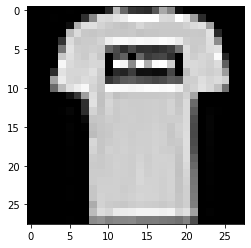

In [4]:
# https://github.com/zalandoresearch/fashion-mnist
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.imshow(X_train_full[1], cmap='gray')
class_names[ y_train_full[1] ]

In [5]:
X_train_full[0].max(), X_train_full[0].min()  ## pixel from 0 -> 255, needs to scale it to 0 -> 1

(255, 0)

In [6]:
X_train_scaled = X_train_full.astype('float32')/255.0
X_train_scaled.dtype

dtype('float32')

## Define Model

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), # So that we don't have to do .reshape(-1,1)
    keras.layers.Dense(300, activation="relu"),  # Hidden (1)
    keras.layers.Dense(100, activation="relu"),  # Hidden (2)
    keras.layers.Dense(10, activation="softmax") # Output Layer, 10 classes, decide with softmax
                                                 # Use sigmoid for 2
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
# https://keras.io/losses/
# https://keras.io/optimizers/ 
# https://keras.io/metrics/

# sparse_categorical_crossentropy -- 1 target class, exclusive
# categorical_crossentropy -- Probability per class , keras.utils.to_categorical() to convert
# binary_crossentropy -- 2 classes
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd",
              metrics=["accuracy"])

## Training

In [10]:
X_valid, X_train = X_train_scaled[:5000], X_train_scaled[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

W0712 22:47:01.424597 4370695616 deprecation.py:323] From /usr/local/anaconda3/envs/hands-on-ml/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 2s 31us/sample - loss: 0.7303 - accuracy: 0.7588 - val_loss: 0.5392 - val_accuracy: 0.8104
Epoch 2/20
55000/55000 [==============================] - 1s 26us/sample - loss: 0.4927 - accuracy: 0.8283 - val_loss: 0.4749 - val_accuracy: 0.8334
Epoch 3/20
55000/55000 [==============================] - 1s 26us/sample - loss: 0.4473 - accuracy: 0.8440 - val_loss: 0.4160 - val_accuracy: 0.8572
Epoch 4/20
55000/55000 [==============================] - 2s 28us/sample - loss: 0.4194 - accuracy: 0.8522 - val_loss: 0.3962 - val_accuracy: 0.8630
Epoch 5/20
55000/55000 [==============================] - 1s 26us/sample - loss: 0.4005 - accuracy: 0.8606 - val_loss: 0.4358 - val_accuracy: 0.8434
Epoch 6/20
55000/55000 [==============================] - 2s 28us/sample - loss: 0.3838 - accuracy: 0.8652 - val_loss: 0.3817 - val_accuracy: 0.8718
Epoch 7/20
55000/55000 [==============================] -

## Evaluation

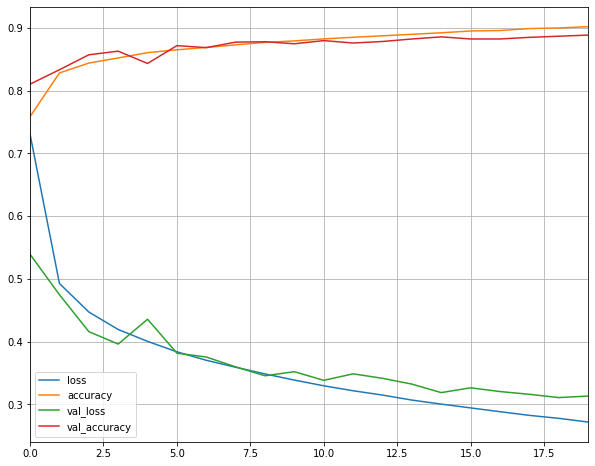

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


pd.DataFrame(history.history).plot(figsize=(10, 8))
plt.grid(True)
plt.show()

In [13]:
model.evaluate(X_test, y_test) # Show Loss and Accuracy

10000/10000 [==============================] - 0s 15us/sample - loss: 2.6555 - accuracy: 0.8327


[2.6554589996337863, 0.8327]

* Both training and validation accuracy increased (good - not overfit)
* Training error is at the beginning, validation is at end of epoch
* Training performance usually ends up better than validation
* Validation loss still going down --> not converged yet
* `.fit()` would pickup where we left off

In [14]:
# 10 more epochs
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 1s 27us/sample - loss: 0.2669 - accuracy: 0.9049 - val_loss: 0.3029 - val_accuracy: 0.8884
Epoch 2/10
55000/55000 [==============================] - 1s 27us/sample - loss: 0.2624 - accuracy: 0.9064 - val_loss: 0.3056 - val_accuracy: 0.8870
Epoch 3/10
55000/55000 [==============================] - 1s 26us/sample - loss: 0.2567 - accuracy: 0.9078 - val_loss: 0.3165 - val_accuracy: 0.8874
Epoch 4/10
55000/55000 [==============================] - 1s 26us/sample - loss: 0.2530 - accuracy: 0.9094 - val_loss: 0.3105 - val_accuracy: 0.8884
Epoch 5/10
55000/55000 [==============================] - 1s 26us/sample - loss: 0.2480 - accuracy: 0.9108 - val_loss: 0.3014 - val_accuracy: 0.8912
Epoch 6/10
55000/55000 [==============================] - 1s 26us/sample - loss: 0.2442 - accuracy: 0.9126 - val_loss: 0.3031 - val_accuracy: 0.8890
Epoch 7/10
55000/55000 [==============================] -

## Prediction

In [20]:
predicted_proba = model.predict(X_train[:3]) # for first 3 
predicted_proba.shape # 3 x 10 -- 3 instance, 10 probability for each class

(3, 10)

In [21]:
predicted_proba.round(2)[0] # Class 4 is the most likely

array([0.  , 0.  , 0.34, 0.  , 0.55, 0.  , 0.1 , 0.  , 0.  , 0.  ],
      dtype=float32)

In [23]:
model.predict_classes(X_train[0:1]) # Returns class 4 as expected

array([4])